In [1]:
import scipy.integrate
import numpy as np

# from numerical_eqs.ode.simple import ODESolve
from numerical_eqs.ode.sdole import SDOLESolve
from numerical_eqs.control import PIDController

import matplotlib.pyplot as plt


In [33]:

def black_box(t, pos, lever):
    return lever**3
    
def func(t, y):
    pos, lever = tuple(y)
    return np.asarray( [black_box(t, pos, lever), 0])


# PID and tunings
pid = PIDController(
    tunings = (1.1, 0.8, 0),
    setpoint = np.pi
)


In [30]:
y0 = np.asarray([1,1])
n_sample = 500
yt = y0
t0 = 0
t1 = 100


time_points = np.linspace(t0, t1, n_sample, endpoint=True)
dt = time_points[1] - time_points[0]


def pid_callback(yt, t):
    pos, lever = tuple(yt)
    lever = pid.update(dt, pos)
    yt = np.asarray([pos, lever])
    return yt



# Now run our solver on the time
res = SDOLESolve(
    y0 = y0,
    func = func,
    t0 = t0,
    t1 = t1,
    progress = True,
    time_controls = {
        'dtmin': 1e-7,
    },
    explicit_times = {
        'time points' : time_points,
        'callback': pid_callback
    }
)

sol_y = res['ys']
sol_t = res['time']
    
print('done')
print(sol_y.shape, sol_t.shape)




  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100.0/100 [00:00<00:00, 620.05it/s]            

done
(743, 2) (743,)


 36%|███▋      | 36.41452606051112/100 [00:54<01:35,  1.51s/it] 


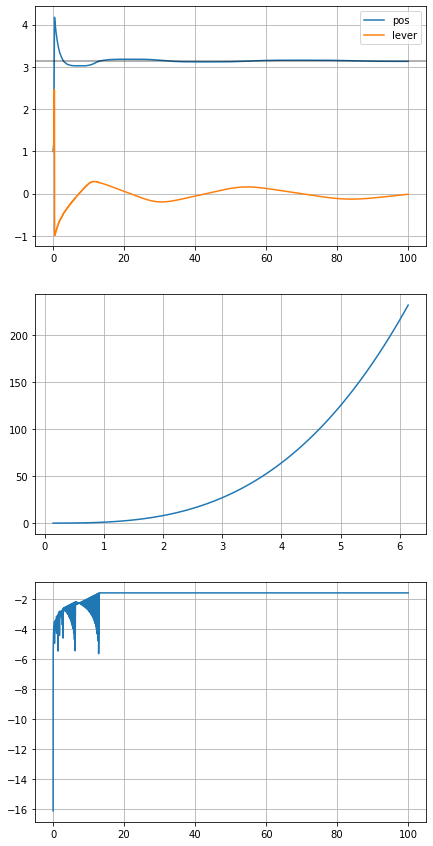

In [31]:

k = 3
fig, axs = plt.subplots(
    k,
    figsize=(7,5*k)
)
axs = np.asarray([axs]).flatten()

axs[0].plot(
    sol_t,
    sol_y[:,0],
    label='pos'
)
axs[0].plot(
    sol_t,
    sol_y[:,1],
    label='lever'
)
axs[0].grid()
axs[0].legend()
axs[0].axhline(pid.setpoint, c='black', alpha=0.4)


x_ = np.linspace(np.pi - 3, np.pi + 3,100) 
axs[1].plot(
    x_,
    black_box(0, 0, x_)
)
axs[1].grid()

axs[2].plot(
    sol_t[1:],
    np.log(sol_t[1:] - sol_t[:-1]),
    label='dt'
)
axs[2].grid()

plt.show()
None